# 4CCP1905: Introduction to Modern Physics

##  Tutorial Question 2 (week 8)

### (Jacopo Siniscalco) 

#### Import (shouldn't need editing)

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

#### Function to get $\Psi$(x) values

In [2]:
def getpsi(xlist,pot,Etot,dx,mh,psione):
    psi = np.zeros(len(xlist))
    psi[0] = 0 ## assume psi(0) = 0
    psi[1] = psione
    for i in range(1,len(xlist) - 1): ## fill i+1
        psi[i+1] = ( 2*psi[i]*( 1 - (5./12)*dx*dx*mh*(Etot - pot[i]) ) - psi[i-1]*( 1 + (1./12)*dx*dx*mh*(Etot - pot[i-1]) ) ) / ( 1 + (1./12)*dx*dx*mh*(Etot - pot[i+1]) ) ## Numerov
    return psi

#### Function to normalize $\Psi$(x)

In [3]:
def getnorm(psi):
    pmin = np.amin(psi)
    pmax = np.amax(psi)
    if (pmin > -pmax):  ## check for one-sided psi
        pmin = -pmax
    npsi = np.zeros(len(psi))
    for i in range(len(npsi)):
        npsi[i] = 2.*(psi[i] - pmin) / (pmax - pmin) - 1.  ##between -1 to 1
    return npsi

#### create list of x values


In [4]:
xlist = np.linspace(-1.0, 1.0, 400,endpoint=False) ## (nm) 
dx = xlist[1] - xlist[0]  ## get x step width (nm)

#### function to create potential energy V(x) <br> in this example: a square well


In [5]:
def getpot(xlist,xwidth,ymax):
    ### (check if x is within the well or not)
    def checkwell(x,xmin,xmax,ymax):
        if (x > xmin and x < xmax):
            return 0
        else:
            return ymax
    ### symmetric well width around zero
    xlowwall = 0 - xwidth/2.
    xhighwall = 0 + xwidth/2.
    ### (apply check to all items in xlist)
    pot = list(map(lambda p: checkwell(p, xlowwall, xhighwall, ymax), xlist))
    return pot

#### define and make the potential energy (in this case a finite well)

In [6]:
xwidth = 1. ## total width of well (nm)
ymax = 10.  ## height of well (eV)

pot = getpot(xlist,xwidth,ymax)

#### enter values for the Schrodinger equation

In [7]:
##Etot = 0.3004 ## (eV) n = 1 too high
##Etot = 0.300296 ## (eV) n = 1
##Etot = 1.19695 ## (eV) n = 2
##Etot = 2.675515  ## (eV) n = 3

Etot = 3.  ## (eV) n = 3

Erest = 0.511e6 ## rest energy of electron (eV)
hc = 1240.  ## (eV nm)
mh = 8.*np.pi*np.pi*Erest/(hc*hc) ## (eV^-1 nm^-2)
##mh = 2.
psione = 0.01

#### create wave (eigenfunction)

In [8]:
psi = getpsi(xlist,pot,Etot,dx,mh,psione)
npsi = getnorm(psi)  ## normalize psi

Plot the final point of nPsi for different energy levels to figure out which satisfy the boundary condition - When it is zero, we've found an appropriate energy level

<IPython.core.display.Javascript object>


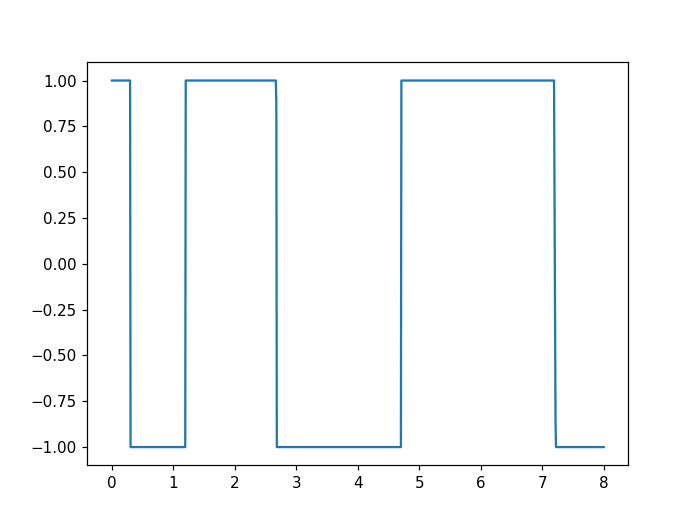

In [9]:
finals = []
energies = np.linspace(0,8,1000)
for i in energies:
    psi = getpsi(xlist,pot,i,dx,mh,psione)
    npsi = getnorm(psi)  ## normalize psi
    finals.append(npsi[-1])
    if np.absolute(npsi[-1]) < 0.1 : print(i)

plt.plot(energies, finals)

In [19]:
#We can see the 4th energy level is somewhere between 4 and 5 eV. We can now optimise in that
#region using scipy root finding

from scipy import optimize

def funct(var):
    psi = getpsi(xlist,pot,var,dx,mh,psione)
    return getnorm(psi)[-1]

level = optimize.brentq(funct, 4, 5)
print (level)

Etot = level

psi = getpsi(xlist,pot,Etot,dx,mh,psione)
npsi = getnorm(psi)  ## normalize psi



4.70381532136644


#### plot potential energy

<IPython.core.display.Javascript object>


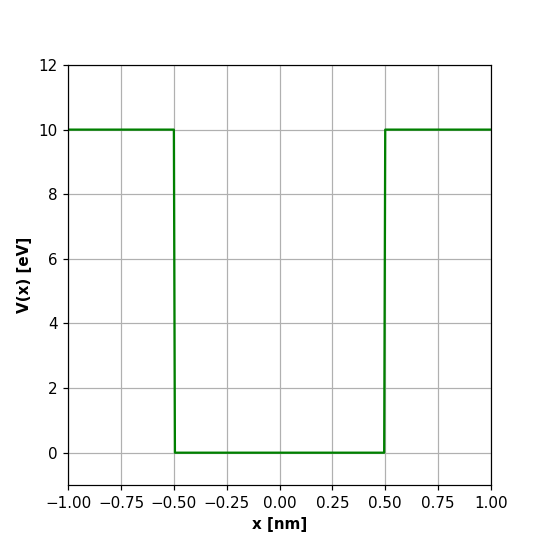

In [20]:
figP, axP = plt.subplots(figsize=(5,5))
axP.set_xlabel(r"x [nm]", weight="bold")
axP.set_ylabel(r"V(x) [eV]", weight="bold")
### potential energy plot range in x and y ###
plt.xlim(-1.0,1.0)
plt.ylim(-1,12)
axP.grid()
axP.plot(xlist, pot, 'g-') # plot pot (as green line)
plt.show()

#### plot the eigenfunction

<IPython.core.display.Javascript object>


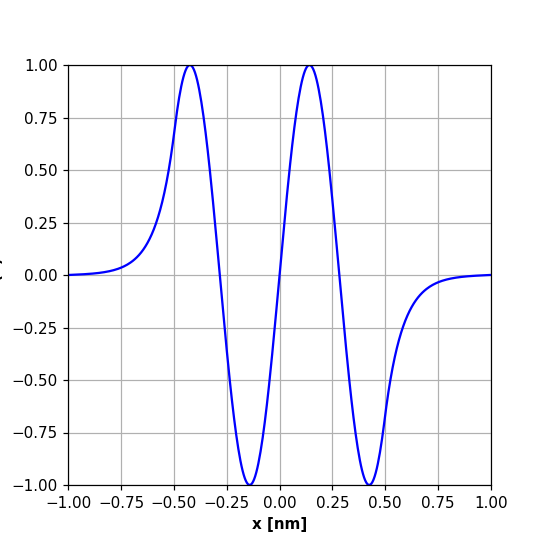

In [21]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel(r"x [nm]", weight="bold")
ax.set_ylabel(r"$\Psi$(x)", weight="bold")
### psi plot range in x and y ###
plt.xlim(-1.0,1.0)
plt.ylim(-1,1)
ax.grid()
### plot the wave ###
ax.plot(xlist, npsi, 'b-') # plot psi
plt.show()